In [2]:
import neuralfoil as nf  # `pip install neuralfoil`
import numpy as np
import aerosandbox as asb  # `pip install aerosandbox`
import matplotlib.pyplot as plt  # `pip install matplotlib`
import matplotlib.cm as cm  # Colormap module
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

c:\Users\wongj_rl8z6\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralfoil\gen2_5_architecture\main.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


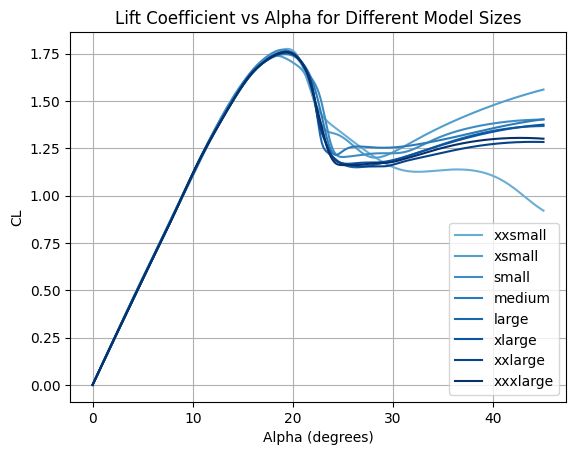

In [3]:
# Define the airfoil, Reynolds number, and range of alphas
airfoil = asb.Airfoil("naca0012")
Re = 5e6
alphas_nf = np.linspace(0, 45, 300)

# List of model sizes
models = ["xxsmall", "xsmall", "small", "medium", "large", "xlarge", "xxlarge", "xxxlarge"]

# Create a custom dark blue colormap
# This creates a colormap that ranges from medium blue to dark blue (avoiding light blues)
dark_blue = plt.cm.Blues(np.linspace(0.5, 1.0, 256))  # Only use the range from 0.5 to 1.0
custom_dark_blue = LinearSegmentedColormap.from_list('CustomDarkBlue', dark_blue)

# Generate a colormap
cmap = custom_dark_blue
norm = plt.Normalize(0, len(models) - 1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot aero data for each model size using an index for the color
for idx, model in enumerate(models):
    aero = nf.get_aero_from_airfoil(
        airfoil=airfoil,
        alpha=alphas_nf,
        Re=Re,
        model_size=model
    )
    ax.plot(alphas_nf, aero["CL"], label=f"{model}", color=cmap(norm(idx)))

# Add labels, title, and colorbar
ax.set_xlabel("Alpha (degrees)")
ax.set_ylabel("CL")
ax.set_title("Lift Coefficient vs Alpha for Different Model Sizes")
ax.legend()
ax.grid(True)

# Create and add the colorbar
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Model Index')

# Display the plot
plt.show()


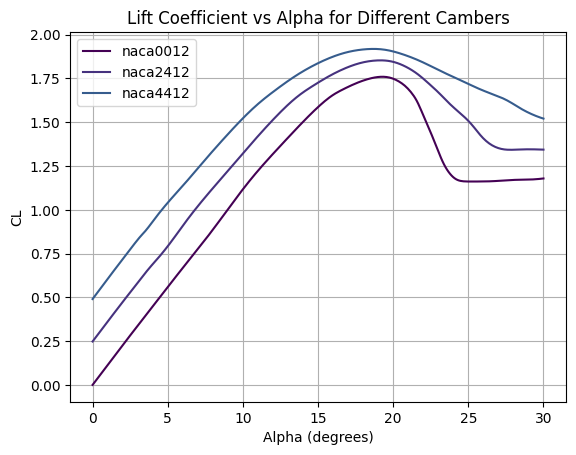

In [4]:
# Define the airfoil, Reynolds number, and range of alphas
Re = 5e6
alphas_nf = np.linspace(0, 30, 300)

# List of model sizes
thickness_airfoils = ["naca0012", "naca0015", "naca0018", "naca0021"]
camber_airfoils = ["naca0012", "naca2412", "naca4412"]

# Generate a colormap
cmap = cm.viridis
norm = plt.Normalize(0, len(models) - 1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot aero data for each model size using an index for the color
for idx, airfoil_name in enumerate(camber_airfoils):
    airfoil = asb.Airfoil(airfoil_name)
    aero = nf.get_aero_from_airfoil(
        airfoil=airfoil,
        alpha=alphas_nf,
        Re=Re,
        model_size="xxxlarge"
    )
    ax.plot(alphas_nf, aero["CL"], label=airfoil_name, color=cmap(norm(idx)))

# Add labels, title, and colorbar
ax.set_xlabel("Alpha (degrees)")
ax.set_ylabel("CL")
ax.set_title("Lift Coefficient vs Alpha for Different Cambers")
ax.legend()
ax.grid(True)

# Create and add the colorbar
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Model Index')

# Display the plot
plt.show()


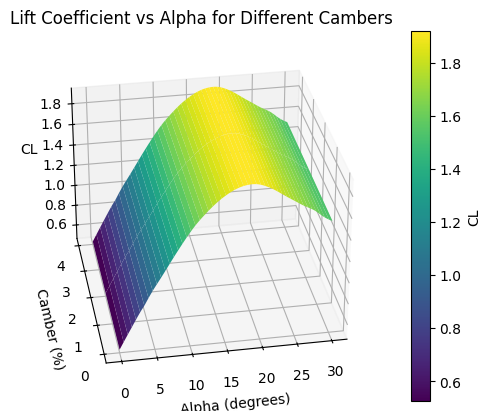

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
camber_values = [0, 2, 4]

# Create a meshgrid for alpha and camber
alpha_grid, camber_grid = np.meshgrid(alphas_nf, camber_values)

# Initialize an array to store the CL values
cl_grid = np.zeros_like(alpha_grid)

for i in range(len(camber_values)):
    airfoil = asb.Airfoil(airfoil_name)
    aero = nf.get_aero_from_airfoil(
        airfoil=airfoil,
        alpha=alpha_grid[i, :],
        Re=Re,
        model_size="xxxlarge"
    )
    cl_grid[i, :] = aero["CL"]

# Plot the surface
surf = ax.plot_surface(alpha_grid, camber_grid, cl_grid, cmap="viridis")

# Add labels, title, and colorbar
ax.set_xlabel("Alpha (degrees)")
ax.set_ylabel("Camber (%)")
ax.set_zlabel("CL")
ax.set_title("Lift Coefficient vs Alpha for Different Cambers")

cbar = fig.colorbar(surf, ax=ax)
cbar.set_label('CL')

ax.view_init(elev=30, azim=260)  # Adjust these values as needed

# Display the plot
plt.show()

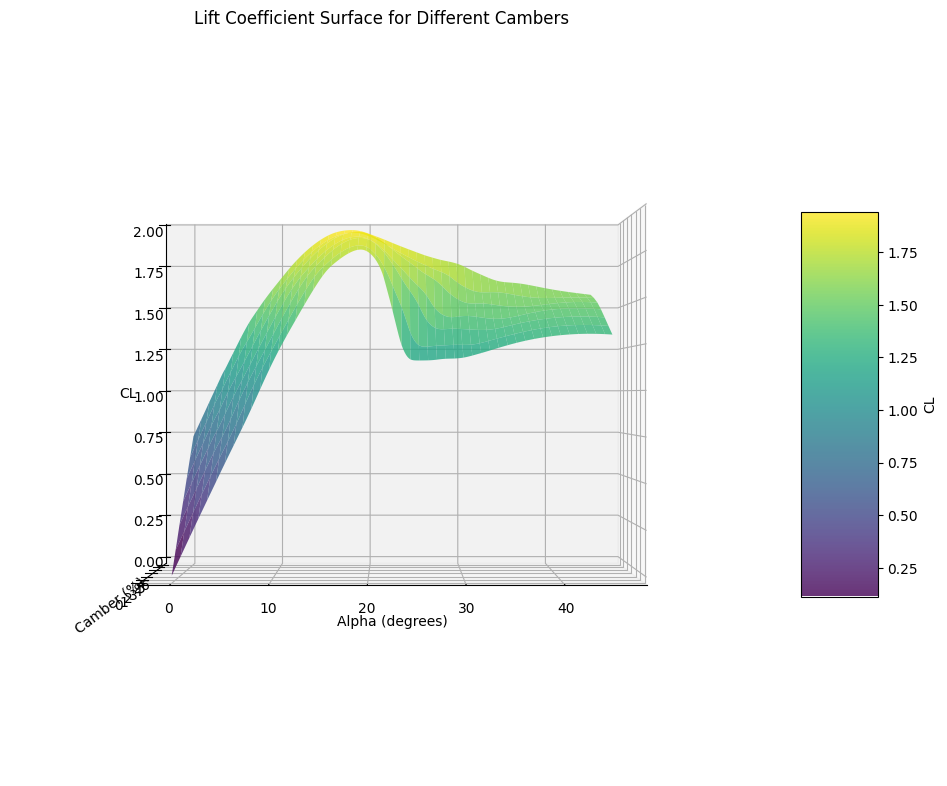

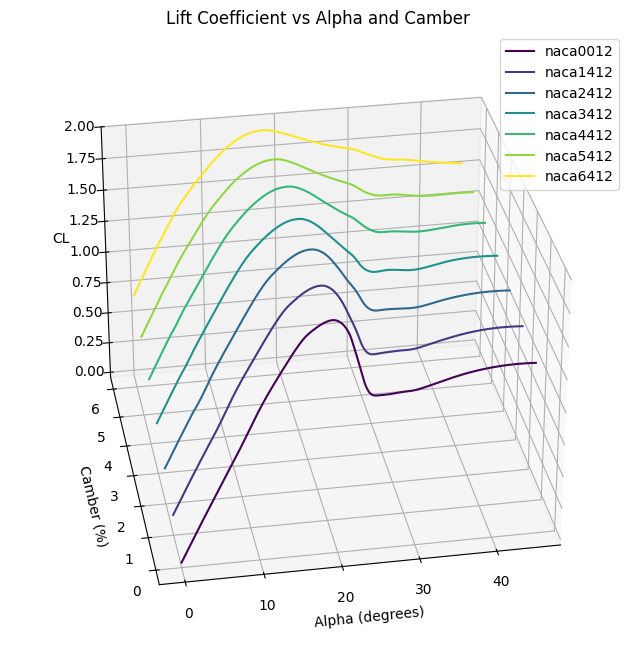

In [6]:
## Claude version to create camber map
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the airfoil, Reynolds number, and range of alphas
Re = 5e6
alphas_nf = np.linspace(0, 45, 300)

# List of airfoils with different cambers - can be any length
camber_airfoils = ["naca0012", "naca1412", "naca2412", "naca3412", "naca4412", "naca5412", "naca6412"]  # Add or remove as needed


# Function to extract camber from NACA 4-digit airfoil names
def extract_camber(airfoil_name):
    # For NACA 4-digit airfoils
    if airfoil_name.lower().startswith('naca') and len(airfoil_name) >= 8:
        # Extract the first digit after "naca"
        return int(airfoil_name[4])
    return 0  # Default for symmetric airfoils

# Extract all unique camber values from the airfoil list
unique_cambers = sorted(list(set([extract_camber(airfoil) for airfoil in camber_airfoils])))

# Generate a colormap
cmap = plt.cm.viridis
norm = plt.Normalize(0, len(camber_airfoils) - 1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a dictionary mapping camber values to airfoil names
camber_to_airfoil = {}
for airfoil in camber_airfoils:
    camber = extract_camber(airfoil)
    camber_to_airfoil[camber] = airfoil

# Setup the figure and 3D axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the mesh grid for the surface plot
alpha_grid, camber_grid = np.meshgrid(alphas_nf, unique_cambers)

# Initialize an empty array for CL values
cl_grid = np.zeros_like(alpha_grid)

# Fill the CL grid with values
for i, camber in enumerate(unique_cambers):
    # Get the corresponding airfoil for this camber
    airfoil_name = camber_to_airfoil[camber]
    
    # Compute CL for each alpha value
    airfoil = asb.Airfoil(airfoil_name)
    aero_data = nf.get_aero_from_airfoil(
        airfoil=airfoil,
        alpha=alphas_nf,
        Re=Re,
        model_size="xxxlarge"
    )
    
    # Store CL values in the grid
    for j, _ in enumerate(alphas_nf):
        cl_grid[i, j] = aero_data["CL"][j]

# Create the 3D surface plot
surf = ax.plot_surface(alpha_grid, camber_grid, cl_grid, 
                      cmap='viridis', edgecolor='none', alpha=0.8)

# Add colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('CL')

# Add labels
ax.set_xlabel('Alpha (degrees)')
ax.set_ylabel('Camber (%)')
ax.set_zlabel('CL')
ax.set_title('Lift Coefficient Surface for Different Cambers')

# Alternatively, you can also plot individual lines for each airfoil
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')

for idx, airfoil_name in enumerate(camber_airfoils):
    camber = extract_camber(airfoil_name)
    airfoil = asb.Airfoil(airfoil_name)
    aero = nf.get_aero_from_airfoil(
        airfoil=airfoil,
        alpha=alphas_nf,
        Re=Re,
        model_size="xxxlarge"
    )
    
    ax2.plot(alphas_nf, 
            [camber] * len(alphas_nf),
            aero["CL"], 
            label=airfoil_name, 
            color=cmap(norm(idx)))

ax2.set_xlabel("Alpha (degrees)")
ax2.set_ylabel("Camber (%)")
ax2.set_zlabel("CL")
ax2.set_title("Lift Coefficient vs Alpha and Camber")
ax2.legend()
ax.view_init(elev=0, azim=270)  # Adjust these values as needed
ax2.view_init(elev=30, azim=260)  # Adjust these values as needed

plt.show()

In [7]:
print("Available attributes and methods in neuralfoil:")
for attr in dir(nf):
    if not attr.startswith('__'):
        print(f"- {attr}")


Available attributes and methods in neuralfoil:
- bl_x_points
- get_aero_from_airfoil
- get_aero_from_coordinates
- get_aero_from_dat_file
- get_aero_from_kulfan_parameters


In [11]:
from aerosandbox.geometry.airfoil.airfoil_families import get_kulfan_parameters
import aerosandbox as asb

# Define the airfoil
airfoil = asb.Airfoil("naca2412")

# Get Kulfan parameters
kulfan_params = get_kulfan_parameters(
    airfoil.coordinates,
    n_weights_per_side=8
)

print(kulfan_params)

{'lower_weights': array([-0.17007317, -0.12075837, -0.1204467 , -0.0658519 , -0.12849652,
       -0.05225167, -0.09086747, -0.07038213]), 'upper_weights': array([0.17693258, 0.18318778, 0.22626059, 0.18959734, 0.20129803,
       0.20030807, 0.20133783, 0.20852971]), 'TE_thickness': 0.0025539054999674377, 'leading_edge_weight': 0.0489441486279617}


{'analysis_confidence': array([9.77246777e-001, 9.76373605e-001, 9.75827303e-001, 9.75691338e-001,
       9.75889596e-001, 9.76291894e-001, 9.76741169e-001, 9.77124053e-001,
       9.77415011e-001, 9.77668445e-001, 9.77957513e-001, 9.78309980e-001,
       9.78703051e-001, 9.79099909e-001, 9.79485384e-001, 9.79875589e-001,
       9.80308840e-001, 9.80834972e-001, 9.81446834e-001, 9.82025321e-001,
       9.82437794e-001, 9.82655137e-001, 9.82752998e-001, 9.82814270e-001,
       9.82864869e-001, 9.82889474e-001, 9.82768971e-001, 9.82296224e-001,
       9.81410749e-001, 9.80248069e-001, 9.78998501e-001, 9.77769078e-001,
       9.76572420e-001, 9.75432620e-001, 9.74444251e-001, 9.73737499e-001,
       9.73423674e-001, 9.73558487e-001, 9.74125364e-001, 9.75039966e-001,
       9.76180946e-001, 9.77433152e-001, 9.78716179e-001, 9.79989397e-001,
       9.81243216e-001, 9.82487162e-001, 9.83738173e-001, 9.85008486e-001,
       9.86294747e-001, 9.87573332e-001, 9.88804251e-001, 9.89941307e-001,
 

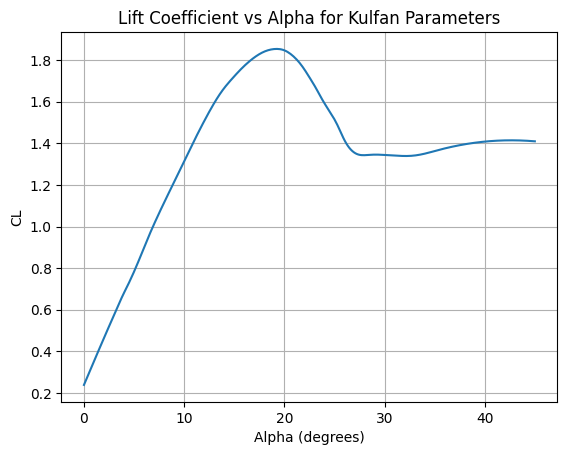

In [14]:
# Try kulfan parameters

areo = nf.get_aero_from_kulfan_parameters(kulfan_parameters=kulfan_params, alpha=alphas_nf, Re=Re, model_size="xxxlarge")
print(areo)

# plot the lift
plt.plot(alphas_nf, areo["CL"])
plt.xlabel("Alpha (degrees)")
plt.ylabel("CL")
plt.title("Lift Coefficient vs Alpha for Kulfan Parameters")
plt.grid(True)
plt.show()

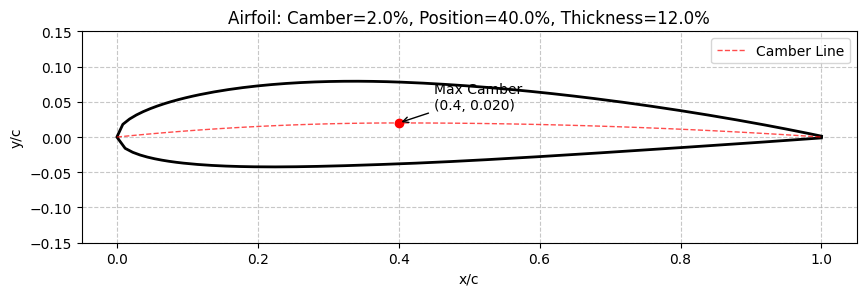

In [ ]:
# Function to generate NACA-like coordinates with custom camber and camber position
def generate_airfoil_coordinates(camber, camber_pos, thickness, num_points=100):
    # Generate x-coordinates from 0 to 1
    x = np.linspace(0, 1, num_points)
    
    # Calculate camber line (full NACA formula with camber position)
    yc = np.zeros_like(x)
    
    # Region before max camber position
    before_max = x < camber_pos
    yc[before_max] = camber * (x[before_max]/camber_pos**2) * (2*camber_pos - x[before_max])
    
    # Region after max camber position
    after_max = x >= camber_pos
    yc[after_max] = camber * ((1-x[after_max])/(1-camber_pos)**2) * (1 + x[after_max] - 2*camber_pos)
    
    # Calculate thickness distribution (NACA formula)
    yt = thickness/0.2 * (0.2969*np.sqrt(x) - 0.1260*x - 0.3516*x**2 + 0.2843*x**3 - 0.1015*x**4)
    
    # Calculate surface slopes (dyc/dx) for camber line
    dyc_dx = np.zeros_like(x)
    dyc_dx[before_max] = (2*camber/camber_pos**2) * (camber_pos - x[before_max])
    dyc_dx[after_max] = (2*camber/(1-camber_pos)**2) * (camber_pos - x[after_max])
    
    # Calculate theta (angle of camber line)
    theta = np.arctan(dyc_dx)
    
    # Calculate upper and lower surface coordinates
    xu = x - yt * np.sin(theta)
    yu = yc + yt * np.cos(theta)
    xl = x + yt * np.sin(theta)
    yl = yc - yt * np.cos(theta)
    
    # Combine into a single set of coordinates (from trailing edge, around leading edge, back to trailing edge)
    # Sort points to ensure proper order
    upper_surface = np.column_stack((xu, yu))
    lower_surface = np.column_stack((xl, yl))
    
    # Sort by x-coordinate
    upper_surface = upper_surface[np.argsort(upper_surface[:, 0])]
    lower_surface = lower_surface[np.argsort(lower_surface[:, 0])]
    
    # Combine surfaces (trailing edge → leading edge → trailing edge)
    coords = np.vstack((np.flipud(lower_surface), upper_surface[1:]))
    
    return coords

def plot_airfoil_shape(camber, camber_pos, thickness, plot_title=None):
    """
    Plot the airfoil shape for given camber, camber position, and thickness.
    
    Parameters:
    -----------
    camber : float
        Maximum camber as a fraction of chord (e.g., 0.04 for 4% camber)
    camber_pos : float
        Position of maximum camber as a fraction of chord (e.g., 0.4 for 40%)
    thickness : float
        Maximum thickness as a fraction of chord (e.g., 0.12 for 12%)
    plot_title : str, optional
        Title for the plot. If None, a default title is generated.
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Generate the airfoil coordinates
    coords = generate_airfoil_coordinates(camber, camber_pos, thickness)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the airfoil shape
    ax.plot(coords[:, 0], coords[:, 1], 'k-', linewidth=2)
    
    # Plot the camber line
    x = np.linspace(0, 1, 100)
    yc = np.zeros_like(x)
    
    # Region before max camber position
    before_max = x < camber_pos
    yc[before_max] = camber * (x[before_max]/camber_pos**2) * (2*camber_pos - x[before_max])
    
    # Region after max camber position
    after_max = x >= camber_pos
    yc[after_max] = camber * ((1-x[after_max])/(1-camber_pos)**2) * (1 + x[after_max] - 2*camber_pos)
    
    ax.plot(x, yc, 'r--', linewidth=1, alpha=0.7, label='Camber Line')
    
    # Add reference point at maximum camber
    max_camber_y = camber
    ax.plot(camber_pos, max_camber_y, 'ro')
    ax.annotate(f'Max Camber\n({camber_pos:.1f}, {camber:.3f})', 
                xy=(camber_pos, max_camber_y),
                xytext=(camber_pos+0.05, max_camber_y+0.02),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    
    # Set title and labels
    if plot_title is None:
        plot_title = f"Airfoil: Camber={camber*100:.1f}%, Position={camber_pos*100:.1f}%, Thickness={thickness*100:.1f}%"
    ax.set_title(plot_title)
    ax.set_xlabel('x/c')
    ax.set_ylabel('y/c')
    
    # Set equal aspect ratio and adjust limits
    ax.set_aspect('equal')
    ax.set_xlim(-0.05, 1.05)
    margin = max(0.15, thickness * 1.2)
    ax.set_ylim(-margin, margin)
    
    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    
    return fig, ax

# Function to compare multiple airfoils with different camber values
def compare_airfoils(camber_values, camber_pos, thickness):
    """
    Plot multiple airfoils with different camber values for comparison.
    
    Parameters:
    -----------
    camber_values : list or array
        List of camber values to compare
    camber_pos : float
        Position of maximum camber (same for all airfoils)
    thickness : float
        Maximum thickness (same for all airfoils)
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Color map for different camber values
    colors = plt.cm.viridis(np.linspace(0, 1, len(camber_values)))
    
    for i, camber in enumerate(camber_values):
        # Generate coordinates
        coords = generate_airfoil_coordinates(camber, camber_pos, thickness)
        
        # Plot with different color for each camber value
        ax.plot(coords[:, 0], coords[:, 1], '-', color=colors[i], 
                linewidth=2, label=f'Camber = {camber*100:.1f}%')
    
    # Set title and labels
    ax.set_title(f"Airfoil Comparison: Position={camber_pos*100:.1f}%, Thickness={thickness*100:.1f}%")
    ax.set_xlabel('x/c')
    ax.set_ylabel('y/c')
    
    # Set equal aspect ratio and adjust limits
    ax.set_aspect('equal')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-thickness*1.2, thickness*1.2)
    
    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='best')
    
    return fig, ax

# Example usage:
# Plot a single airfoil
fig, ax = plot_airfoil_shape(camber=0.02, camber_pos=0.4, thickness=0.12)
plt.show()

# Plot multiple airfoils for comparison
# fig, ax = compare_airfoils(camber_values=[0.0, 0.02, 0.04, 0.06], camber_pos=0.4, thickness=0.12)
# plt.show()

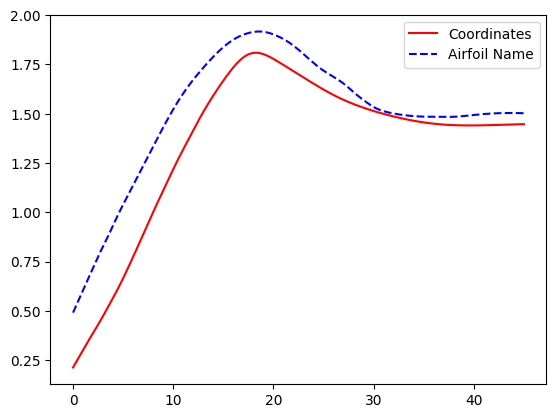

In [ ]:
alphas_nf = np.linspace(0, 45, 300)
Re = 5e6
camber=0.02
camber_pos=0.4
thickness=0.12
coords = generate_airfoil_coordinates(camber, camber_pos, thickness)
aero_custom = nf.get_aero_from_coordinates(coordinates=coords, alpha=alphas_nf, Re=Re, model_size="xxlarge")
airfoil=asb.Airfoil("naca4412")
aero_reg = nf.get_aero_from_airfoil(airfoil=airfoil,alpha=alphas_nf,Re=Re, model_size="xxlarge")

plt.figure()
plt.plot(alphas_nf, aero_custom["CL"], "r", label="Coordinates")
plt.plot(alphas_nf, aero_reg["CL"], "b--", label="Airfoil Name")
plt.legend()
plt.show()

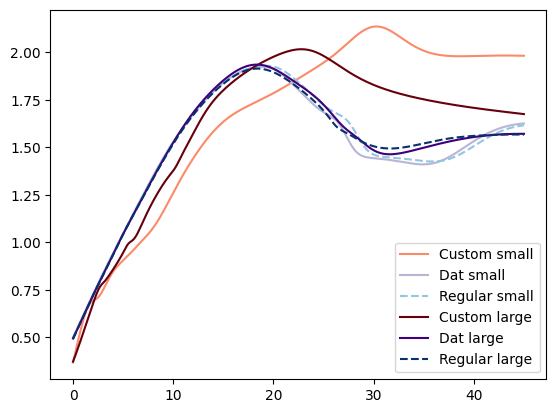

In [ ]:
alphas_nf = np.linspace(0, 45, 300)
Re = 5e6
camber=0.04
camber_pos=0.4
thickness=0.12
coords = generate_airfoil_coordinates(camber, camber_pos, thickness)

models = ["small", "large"] # ["xxsmall", "xsmall", "small", "medium", "large", "xlarge", "xxlarge", "xxxlarge"]

reds = plt.get_cmap("Reds")(np.linspace(0.4, 1, len(models)))  # Reds colormap for custom aeros
blues = plt.get_cmap("Blues")(np.linspace(0.4, 1, len(models)))  # Blues colormap for regular aeros
purples = plt.get_cmap("Purples")(np.linspace(0.4, 1, len(models)))  # Blues colormap for regular aeros


filename = "../Xfoil/naca4412.dat"

for idx, model in enumerate(models):
    aero_custom = nf.get_aero_from_coordinates(coordinates=coords, alpha=alphas_nf, Re=Re, model_size=model)
    aero_dat = nf.get_aero_from_dat_file(filename=filename, alpha=alphas_nf, Re=Re, model_size=model)
    airfoil = asb.Airfoil("naca4412")
    aero_reg = nf.get_aero_from_airfoil(airfoil=airfoil, alpha=alphas_nf, Re=Re, model_size=model)

    plt.plot(alphas_nf, aero_custom["CL"], color=reds[idx], label=f"Custom {model}")
    plt.plot(alphas_nf, aero_dat["CL"], color=purples[idx], label=f"Dat {model}")
    plt.plot(alphas_nf, aero_reg["CL"], color=blues[idx], linestyle="--", label=f"Regular {model}")

plt.legend()
plt.show()

In [ ]:
## Try making the coordinates like you did in julia

def thickness_function(x, m):
    """
    Function for airfoil thickness along the chord.
    
    Thickness is given by max thickness, m, and distance along the airfoil, x.
    """
    t = 10 * m * (0.2969 * x**(1/2) - 0.1260 * x - 0.3537 * x**2 + 0.2843 * x**3 - 0.1015 * x**4)
    return t


def camber_function(c, p, x):
    """
    Function for airfoil camber along the chord.
    
    Where c is the value of maximum camber (% chord), and p is the position of max camber (units of chord/10),
    and x is position along unit length chord.
    """
    if x <= p:
        zbar = c * (2 * p * x - x**2) / p**2
    else:
        zbar = c * (1 - 2 * p + 2 * p * x - x**2) / (1 - p)**2
    return zbar


def coor(c_percent, p_tenth, t_percent, x_array):
    """
    Function for calculating airfoil coordinates using the NACA approach.
    
    Parameters:
    c_percent (float): Max camber in percentage (0-9)
    p_tenth (float): Position of max camber in tenths (1-9)
    t_percent (float): Max thickness in percentage (1-40)
    x_array (array): Array of x positions from 0 to 1
    
    Returns:
    array: Combined coordinates tracing the entire airfoil
    """
    # Convert variables to correct magnitudes
    c = c_percent / 100
    t = t_percent / 100
    p = p_tenth / 10
    
    # Arrays for storing coordinates
    xu = np.zeros_like(x_array)
    yu = np.zeros_like(x_array)
    xl = np.zeros_like(x_array)
    yl = np.zeros_like(x_array)
    
    # Calculate surface slopes (dyc/dx) for camber line
    dyc_dx = np.zeros_like(x_array)
    
    for i, x_val in enumerate(x_array):
        # Calculate camber
        zbar = camber_function(c, p, x_val)
        
        # Calculate thickness
        thick = thickness_function(x_val, t)
        
        # Calculate slope of camber line
        if x_val <= p:
            dyc_dx[i] = (2 * c / p**2) * (p - x_val)
        else:
            dyc_dx[i] = (2 * c / (1 - p)**2) * (p - x_val)
        
        # Calculate theta (angle of camber line)
        theta = np.arctan(dyc_dx[i])
        
        # Calculate upper and lower surface coordinates
        xu[i] = x_val - (thick/2) * np.sin(theta)
        yu[i] = zbar + (thick/2) * np.cos(theta)
        xl[i] = x_val + (thick/2) * np.sin(theta)
        yl[i] = zbar - (thick/2) * np.cos(theta)
    
    # Sort points to ensure proper order
    upper_surface = np.column_stack((xu, yu))
    lower_surface = np.column_stack((xl, yl))
    
    # Sort by x-coordinate
    upper_surface = upper_surface[np.argsort(upper_surface[:, 0])]
    lower_surface = lower_surface[np.argsort(lower_surface[:, 0])]
    
    # Combine surfaces (trailing edge → leading edge → trailing edge)
    coords = np.vstack((np.flipud(lower_surface), upper_surface[1:]))
    
    return coords


def generate_naca_airfoil(naca_code=None, camber=None, camber_pos=None, thickness=None, num_points=100):
    """
    Generate airfoil coordinates from either a 4-digit NACA code or direct parameters.
    
    Parameters:
    naca_code (str, optional): Four-digit NACA code (e.g., '2412')
    camber (float, optional): Max camber in percentage (0-9)
    camber_pos (float, optional): Position of max camber in tenths (1-9)
    thickness (float, optional): Max thickness in percentage (1-40)
    num_points (int): Number of points to generate
    
    Returns:
    array: Airfoil coordinates
    
    Note: Either provide naca_code OR all three parameters (camber, camber_pos, thickness)
    """
    if naca_code is not None:
        if len(naca_code) != 4:
            raise ValueError("NACA code must be 4 digits")
        
        # Parse NACA code
        c_percent = float(naca_code[0])  # Max camber (%)
        p_tenth = float(naca_code[1])    # Position of max camber (tenths)
        t_percent = float(naca_code[2:4])  # Max thickness (%)
    
    elif camber is not None and camber_pos is not None and thickness is not None:
        # Use direct parameters
        c_percent = float(camber)
        p_tenth = float(camber_pos)
        t_percent = float(thickness)
    
    else:
        raise ValueError("Either provide a NACA code or all three parameters (camber, camber_pos, thickness)")
    
    # Generate x-coordinates from 0 to 1
    x = np.linspace(0, 1, num_points)
    
    # Calculate coordinates
    return coor(c_percent, p_tenth, t_percent, x)


def generate_naca_airfoil(naca_code, num_points=100):
    """
    Generate airfoil coordinates from a 4-digit NACA code.
    
    Parameters:
    naca_code (str): Four-digit NACA code (e.g., '2412')
    num_points (int): Number of points to generate
    
    Returns:
    array: Airfoil coordinates
    """
    if len(naca_code) != 4:
        raise ValueError("NACA code must be 4 digits")
    
    # Parse NACA code
    c1 = int(naca_code[0])  # Max camber (%)
    p1 = int(naca_code[1])  # Position of max camber (tenths)
    t1 = int(naca_code[2:4])  # Max thickness (%)
    
    # Generate x-coordinates from 0 to 1
    x = np.linspace(0, 1, num_points)
    
    # Calculate coordinates
    return coor(c1, p1, t1, x)

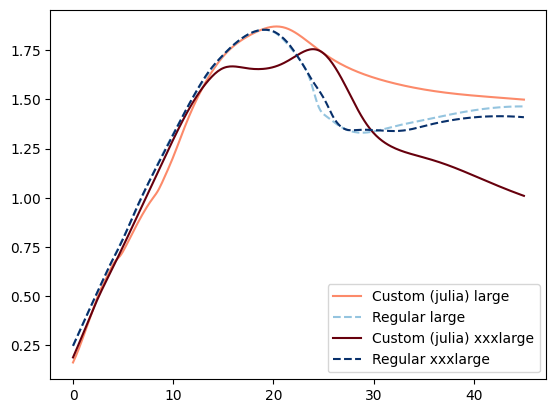

In [ ]:
# coords = generate_naca_airfoil('2412', num_points=100)
coords = coor(2, 4, 12, np.linspace(0, 1, 100))
models = ["large", "xxxlarge"] # ["xxsmall", "xsmall", "small", "medium", "large", "xlarge", "xxlarge", "xxxlarge"]


for idx, model in enumerate(models):
    aero_custom = nf.get_aero_from_coordinates(coordinates=coords, alpha=alphas_nf, Re=Re, model_size=model)
    # aero_dat = nf.get_aero_from_dat_file(filename=filename, alpha=alphas_nf, Re=Re, model_size=model)
    airfoil = asb.Airfoil("naca2412")
    aero_reg = nf.get_aero_from_airfoil(airfoil=airfoil, alpha=alphas_nf, Re=Re, model_size=model)

    plt.plot(alphas_nf, aero_custom["CL"], color=reds[idx], label=f"Custom (julia) {model}")
    # plt.plot(alphas_nf, aero_dat["CL"], color=purples[idx], label=f"Dat {model}")
    plt.plot(alphas_nf, aero_reg["CL"], color=blues[idx], linestyle="--", label=f"Regular {model}")

plt.legend()
plt.show()
# print(coords)

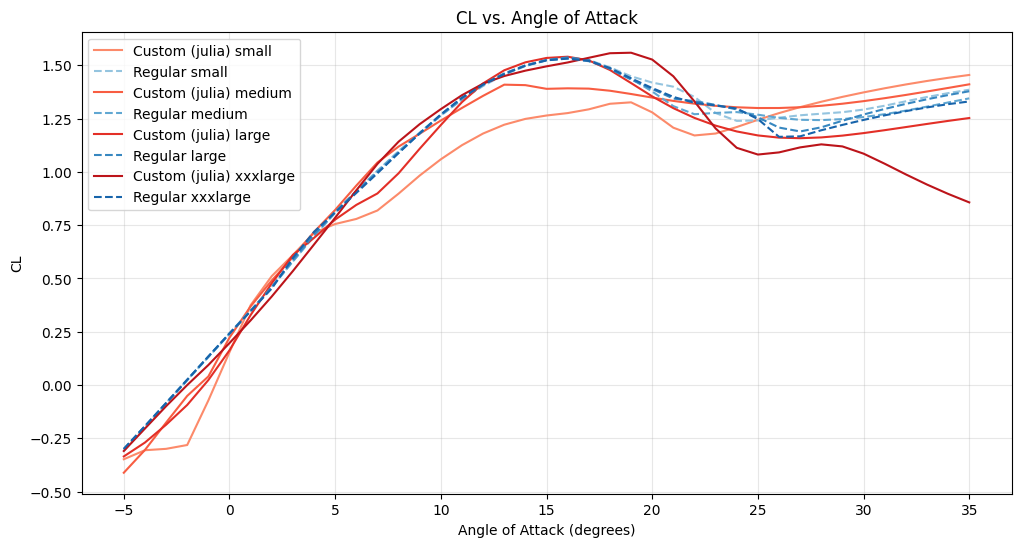

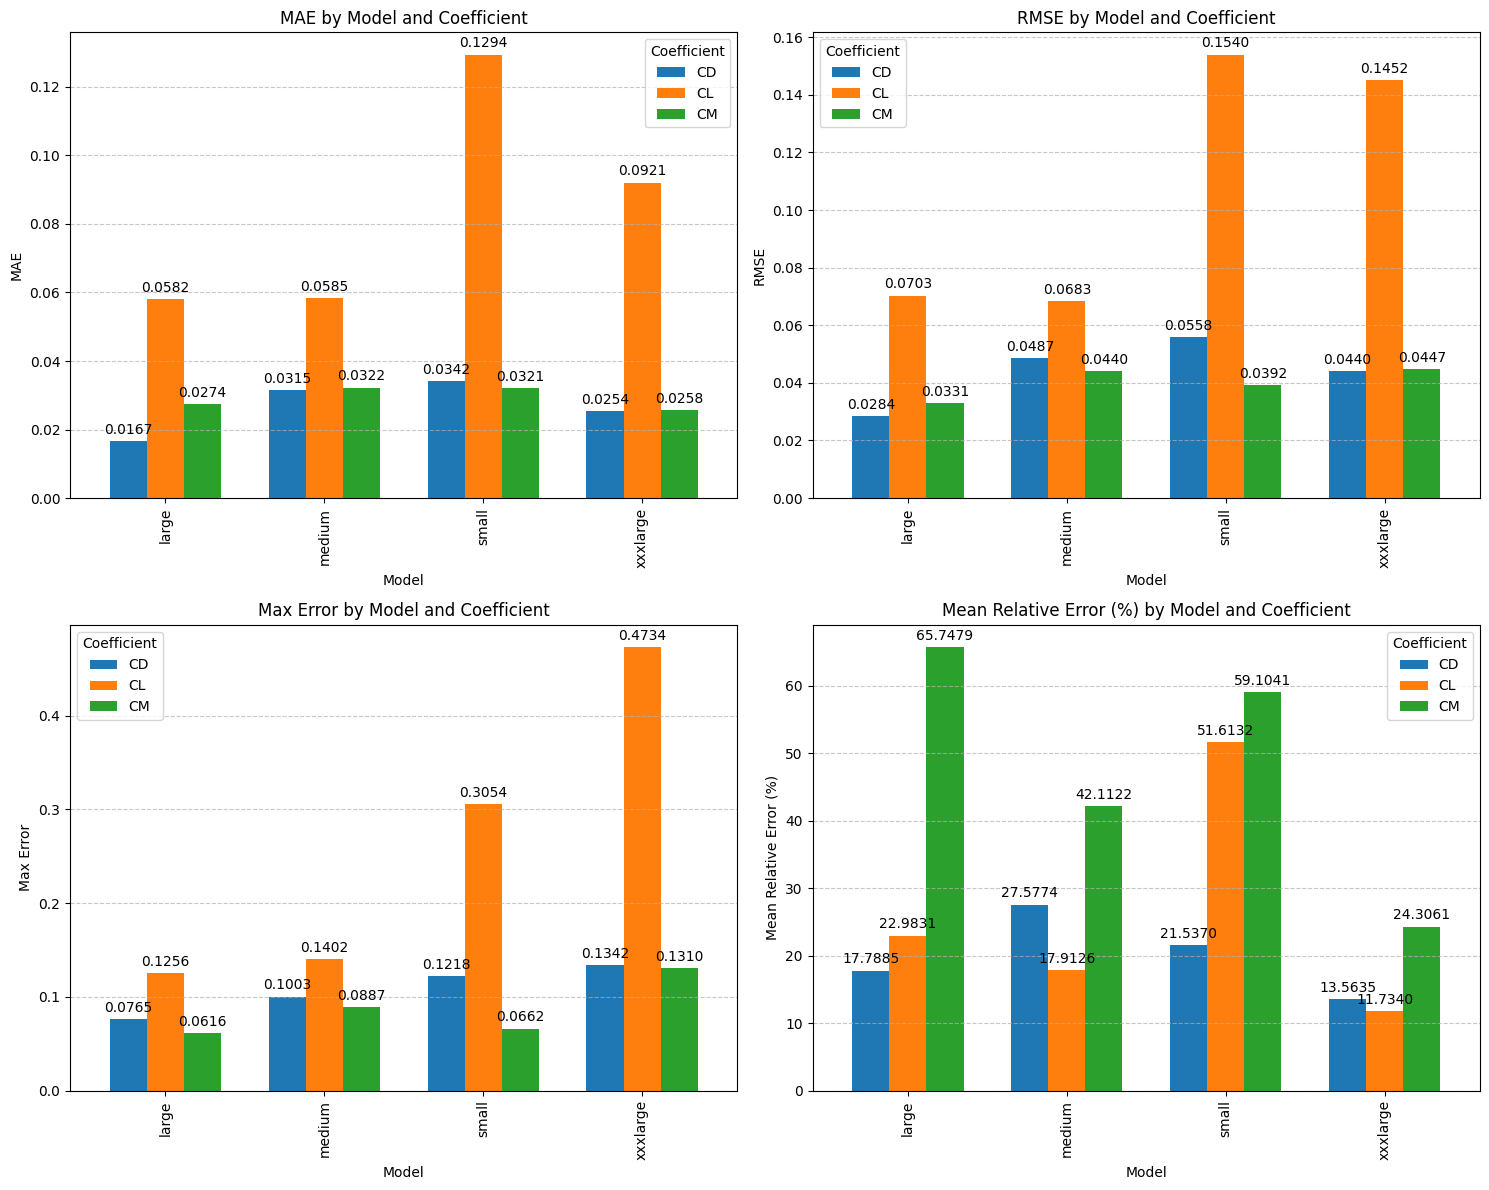

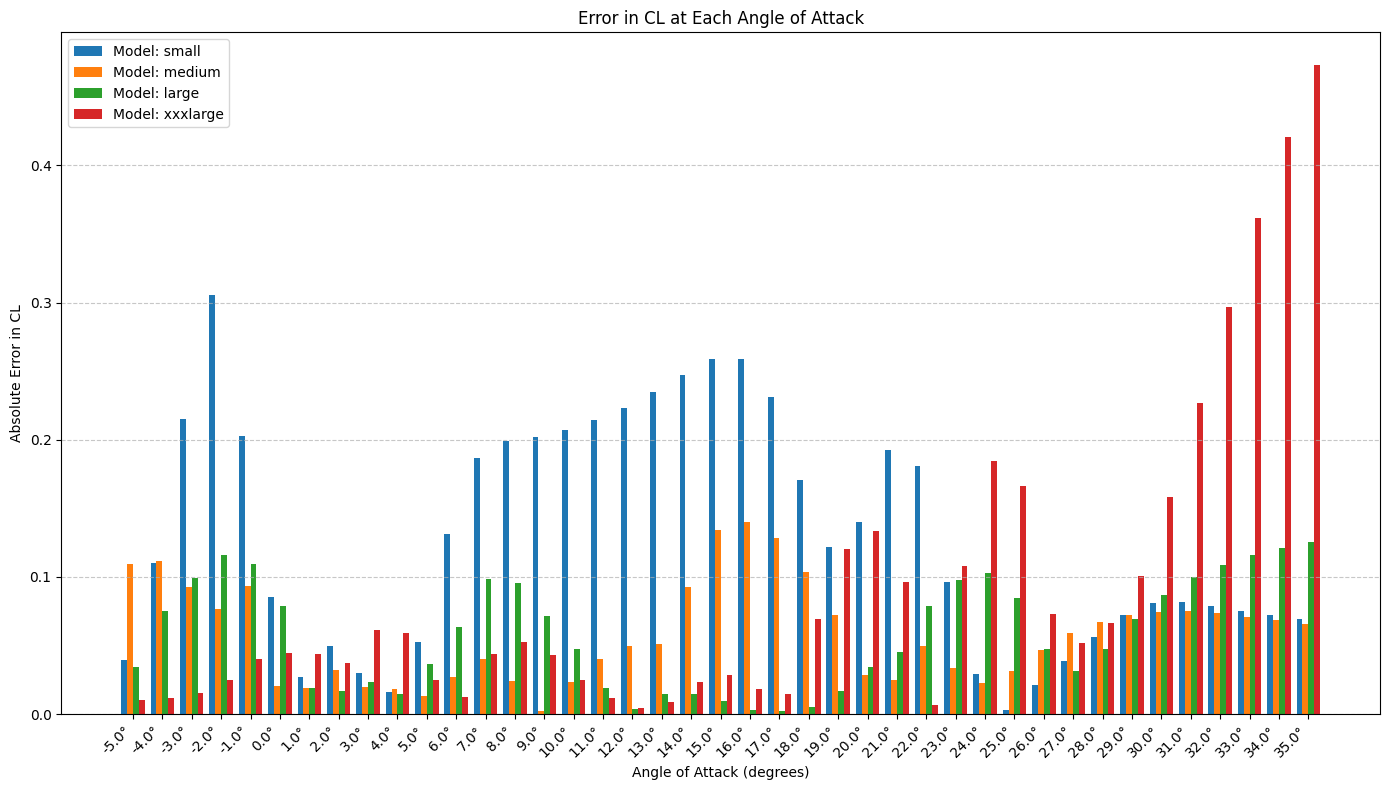

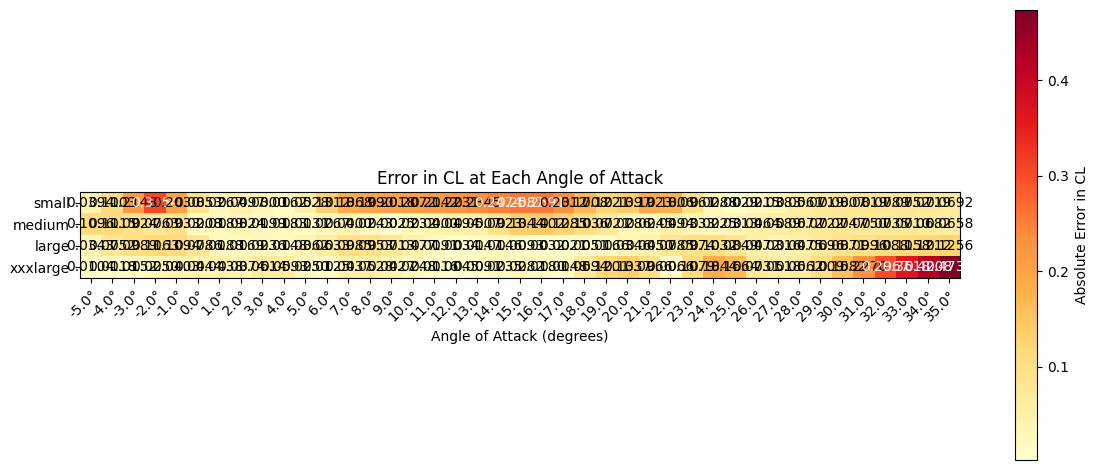

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_error_metrics(aero1, aero2, coefficient='CL'):
    """
    Calculate various error metrics between two aerodynamic datasets.
    
    Parameters:
    aero1, aero2: Dictionaries containing aerodynamic data
    coefficient: The coefficient to compare ('CL', 'CD', etc.)
    
    Returns:
    dict: Dictionary of error metrics
    """
    y1 = aero1[coefficient]
    y2 = aero2[coefficient]
    
    # Absolute error
    abs_error = np.abs(y1 - y2)
    
    # Mean Absolute Error (MAE)
    mae = np.mean(abs_error)
    
    # Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((y1 - y2)**2))
    
    # Maximum error
    max_error = np.max(abs_error)
    
    # Relative error (percentage)
    # Avoid division by zero by adding a small epsilon where y2 is close to zero
    epsilon = 1e-10
    rel_error = np.abs(y1 - y2) / (np.abs(y2) + epsilon) * 100
    mean_rel_error = np.mean(rel_error)
    
    return {
        'absolute_error': abs_error,
        'relative_error': rel_error,
        'mae': mae,
        'rmse': rmse,
        'max_error': max_error,
        'mean_relative_error': mean_rel_error
    }

def plot_aero_coefficient_comparison(alphas, aero_custom, aero_reg, models, coefficient='CL'):
    """
    Plot aerodynamic coefficients comparison.
    
    Parameters:
    alphas: Array of angle of attack values
    aero_custom: List of custom aerodynamic data dictionaries for each model
    aero_reg: List of regular aerodynamic data dictionaries for each model
    models: List of model names
    coefficient: The coefficient to plot
    """
    plt.figure(figsize=(12, 6))
    
    # Create a custom colormap with nice colors
    blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(models)))
    reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(models)))
    
    for j, model in enumerate(models):
        plt.plot(alphas, aero_custom[j][coefficient], color=reds[j], label=f"Custom (julia) {model}")
        plt.plot(alphas, aero_reg[j][coefficient], color=blues[j], linestyle="--", label=f"Regular {model}")
    
    plt.xlabel("Angle of Attack (degrees)")
    plt.ylabel(f"{coefficient}")
    plt.title(f"{coefficient} vs. Angle of Attack")
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    return plt.gcf()

def plot_error_bars(alphas, aero_custom, aero_reg, models, coefficients=['CL', 'CD', 'CM']):
    """
    Create bar plots for different error metrics between custom and regular aero data.
    
    Parameters:
    alphas: Array of angle of attack values
    aero_custom: List of custom aerodynamic data dictionaries for each model
    aero_reg: List of regular aerodynamic data dictionaries for each model
    models: List of model names
    coefficients: List of coefficient names to analyze
    """
    # Calculate all error metrics
    all_errors = []
    
    for i, coef in enumerate(coefficients):
        for j, model in enumerate(models):
            error_metrics = calculate_error_metrics(aero_custom[j], aero_reg[j], coef)
            
            all_errors.append({
                'Model': model,
                'Coefficient': coef,
                'MAE': error_metrics['mae'],
                'RMSE': error_metrics['rmse'],
                'Max Error': error_metrics['max_error'],
                'Mean Relative Error (%)': error_metrics['mean_relative_error']
            })
    
    # Convert to DataFrame for easier plotting
    error_df = pd.DataFrame(all_errors)
    
    # Create figure with subplots for each error metric
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    metrics = ['MAE', 'RMSE', 'Max Error', 'Mean Relative Error (%)']
    
    for i, metric in enumerate(metrics):
        # Pivot data for grouped bar plot
        pivot_data = error_df.pivot(index='Model', columns='Coefficient', values=metric)
        
        # Create bar plot
        pivot_data.plot(kind='bar', ax=axes[i], width=0.7)
        
        axes[i].set_title(f"{metric} by Model and Coefficient")
        axes[i].set_ylabel(metric)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%.4f', padding=3)
    
    plt.tight_layout()
    
    return fig, error_df

def plot_error_bars_by_alpha(alphas, aero_custom, aero_reg, models, coefficient='CL'):
    """
    Create bar plots showing error at each angle of attack.
    
    Parameters:
    alphas: Array of angle of attack values
    aero_custom: List of custom aerodynamic data dictionaries for each model
    aero_reg: List of regular aerodynamic data dictionaries for each model
    models: List of model names
    coefficient: The coefficient to analyze
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Calculate the width of each bar based on number of models
    width = 0.8 / len(models)
    
    # Generate x positions for grouped bars
    x = np.arange(len(alphas))
    
    # Plot bars for each model
    for i, model in enumerate(models):
        # Calculate absolute error at each alpha
        abs_error = np.abs(aero_custom[i][coefficient] - aero_reg[i][coefficient])
        
        # Position bars with appropriate offset
        pos = x + (i - len(models)/2 + 0.5) * width
        
        # Create bars
        bars = ax.bar(pos, abs_error, width, label=f"Model: {model}")
    
    # Add labels and customize plot
    ax.set_xlabel('Angle of Attack (degrees)')
    ax.set_ylabel(f'Absolute Error in {coefficient}')
    ax.set_title(f'Error in {coefficient} at Each Angle of Attack')
    ax.set_xticks(x)
    ax.set_xticklabels([f"{alpha:.1f}°" for alpha in alphas])
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels if there are many angles
    if len(alphas) > 10:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    
    return fig

def plot_error_bars_alpha_heatmap(alphas, aero_custom, aero_reg, models, coefficient='CL'):
    """
    Create a heatmap showing error at each angle of attack for each model.
    
    Parameters:
    alphas: Array of angle of attack values
    aero_custom: List of custom aerodynamic data dictionaries for each model
    aero_reg: List of regular aerodynamic data dictionaries for each model
    models: List of model names
    coefficient: The coefficient to analyze
    """
    # Calculate errors at each alpha for each model
    error_data = np.zeros((len(models), len(alphas)))
    
    for i, model in enumerate(models):
        error_data[i] = np.abs(aero_custom[i][coefficient] - aero_reg[i][coefficient])
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, len(models) * 1.2))
    
    # Create heatmap
    im = ax.imshow(error_data, cmap='YlOrRd')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.set_label(f'Absolute Error in {coefficient}')
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(alphas)))
    ax.set_yticks(np.arange(len(models)))
    ax.set_xticklabels([f"{alpha:.1f}°" for alpha in alphas])
    ax.set_yticklabels(models)
    
    # Rotate the x labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations with the actual values
    for i in range(len(models)):
        for j in range(len(alphas)):
            text = ax.text(j, i, f"{error_data[i, j]:.4f}",
                          ha="center", va="center", color="black" if error_data[i, j] < 0.5*np.max(error_data) else "white")
    
    ax.set_title(f"Error in {coefficient} at Each Angle of Attack")
    ax.set_xlabel("Angle of Attack (degrees)")
    
    plt.tight_layout()
    
    return fig

# Example usage:

# Your existing code
coords = coor(2, 4, 12, np.linspace(0, 1, 100))
models = ["small", "medium", "large", "xxxlarge"]
alphas_nf = np.linspace(-5, 35, 41)  # Example alpha range
Re = 1e6  # Example Reynolds number

# Store results
aero_custom_results = []
aero_reg_results = []

for model in models:
    # Get aerodynamic data (replace with your actual functions)
    aero_custom = nf.get_aero_from_coordinates(coordinates=coords, alpha=alphas_nf, Re=Re, model_size=model)
    airfoil = asb.Airfoil("naca2412")
    aero_reg = nf.get_aero_from_airfoil(airfoil=airfoil, alpha=alphas_nf, Re=Re, model_size=model)
    
    aero_custom_results.append(aero_custom)
    aero_reg_results.append(aero_reg)

# 1. Plot coefficient comparison
coef_fig = plot_aero_coefficient_comparison(alphas_nf, aero_custom_results, aero_reg_results, models, 'CL')
plt.show()

# 2. Plot error metrics as bar charts
error_fig, error_df = plot_error_bars(alphas_nf, aero_custom_results, aero_reg_results, models)
plt.show()

# 3. Plot error at each angle of attack
alpha_error_fig = plot_error_bars_by_alpha(alphas_nf, aero_custom_results, aero_reg_results, models, 'CL')
plt.show()

# 4. Plot error heatmap by angle of attack
heatmap_fig = plot_error_bars_alpha_heatmap(alphas_nf, aero_custom_results, aero_reg_results, models, 'CL')
plt.show()



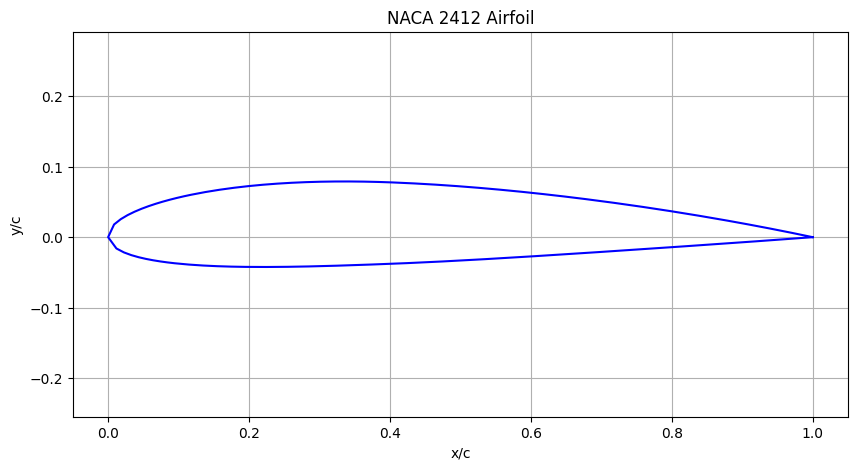

In [ ]:
# Plot the airfoil
plt.figure(figsize=(10, 5))
plt.plot(coords[:, 0], coords[:, 1], 'b-')
plt.axis('equal')
plt.grid(True)
plt.title('NACA 2412 Airfoil')
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.show()

In [ ]:
# try getting coordinates from dat file and then using aero
def read_airfoil_dat(filepath):
    """
    Read airfoil coordinates from a .dat file and return them in the same format
    as the coor function.
    
    The .dat file should have two columns: x and y coordinates.
    
    Parameters:
    filepath (str): Path to the .dat file
    
    Returns:
    array: Combined coordinates tracing the entire airfoil
    """
    try:
        # Read the data file
        data = np.loadtxt(filepath)
    except ValueError:
        # Sometimes airfoil files have irregular spacing
        # Try reading with a more flexible approach
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # Clean up lines and parse them
        data = []
        for line in lines:
            # Skip empty lines or header lines that might contain text
            line = line.strip()
            if not line or not any(c.isdigit() for c in line):
                continue
            
            # Split by whitespace and convert to float
            try:
                values = [float(val) for val in line.split()]
                if len(values) >= 2:  # Ensure we have at least x and y
                    data.append([values[0], values[1]])
            except ValueError:
                # Skip lines that can't be parsed as floats
                continue
        
        data = np.array(data)
    
    # Check if the data is in the right format
    if data.shape[1] < 2:
        raise ValueError("File does not contain at least two columns (x and y coordinates)")
    
    # Some airfoil files start at the trailing edge, go to the leading edge, and back
    # Others start at the leading edge and go around
    # We need to determine the format and standardize it
    
    # Find the index of the leading edge (minimum x value)
    leading_edge_idx = np.argmin(data[:, 0])
    
    if leading_edge_idx == 0 or leading_edge_idx == len(data) - 1:
        # Format already has the leading edge at the start or end
        # Sort to ensure the right order - from trailing edge, around leading edge, to trailing edge
        if data[0, 0] < data[-1, 0]:  # If first point's x is less than last point's x
            # Leading edge is at the start, we need to reverse it
            data = np.flipud(data)
        
    else:
        # Leading edge is in the middle, need to rearrange
        # Split into upper and lower surfaces
        upper_surface = data[:leading_edge_idx + 1, :]
        lower_surface = data[leading_edge_idx:, :]
        
        # Ensure they're sorted from leading edge to trailing edge
        upper_surface = upper_surface[np.argsort(upper_surface[:, 0])]
        lower_surface = lower_surface[np.argsort(lower_surface[:, 0])]
        
        # Combine into the format: trailing edge -> leading edge -> trailing edge
        data = np.vstack((np.flipud(upper_surface[:-1]), lower_surface))
    
    return data

In [ ]:
coords_test = np.loadtxt("../Xfoil/naca2412.dat")
print(coords_test)

[[ 1.      0.0013]
 [ 0.95    0.0114]
 [ 0.9     0.0208]
 [ 0.8     0.0375]
 [ 0.7     0.0518]
 [ 0.6     0.0636]
 [ 0.5     0.0724]
 [ 0.4     0.078 ]
 [ 0.3     0.0788]
 [ 0.25    0.0767]
 [ 0.2     0.0726]
 [ 0.15    0.0661]
 [ 0.1     0.0563]
 [ 0.075   0.0496]
 [ 0.05    0.0413]
 [ 0.025   0.0299]
 [ 0.0125  0.0215]
 [ 0.      0.    ]
 [ 0.0125 -0.0165]
 [ 0.025  -0.0227]
 [ 0.05   -0.0301]
 [ 0.075  -0.0346]
 [ 0.1    -0.0375]
 [ 0.15   -0.041 ]
 [ 0.2    -0.0423]
 [ 0.25   -0.0422]
 [ 0.3    -0.0412]
 [ 0.4    -0.038 ]
 [ 0.5    -0.0334]
 [ 0.6    -0.0276]
 [ 0.7    -0.0214]
 [ 0.8    -0.015 ]
 [ 0.9    -0.0082]
 [ 0.95   -0.0048]
 [ 1.     -0.0013]]


[[ 1.      0.0013]
 [ 0.95    0.0114]
 [ 0.9     0.0208]
 [ 0.8     0.0375]
 [ 0.7     0.0518]
 [ 0.6     0.0636]
 [ 0.5     0.0724]
 [ 0.4     0.078 ]
 [ 0.3     0.0788]
 [ 0.25    0.0767]
 [ 0.2     0.0726]
 [ 0.15    0.0661]
 [ 0.1     0.0563]
 [ 0.075   0.0496]
 [ 0.05    0.0413]
 [ 0.025   0.0299]
 [ 0.0125  0.0215]
 [ 0.      0.    ]
 [ 0.0125 -0.0165]
 [ 0.025  -0.0227]
 [ 0.05   -0.0301]
 [ 0.075  -0.0346]
 [ 0.1    -0.0375]
 [ 0.15   -0.041 ]
 [ 0.2    -0.0423]
 [ 0.25   -0.0422]
 [ 0.3    -0.0412]
 [ 0.4    -0.038 ]
 [ 0.5    -0.0334]
 [ 0.6    -0.0276]
 [ 0.7    -0.0214]
 [ 0.8    -0.015 ]
 [ 0.9    -0.0082]
 [ 0.95   -0.0048]
 [ 1.     -0.0013]]


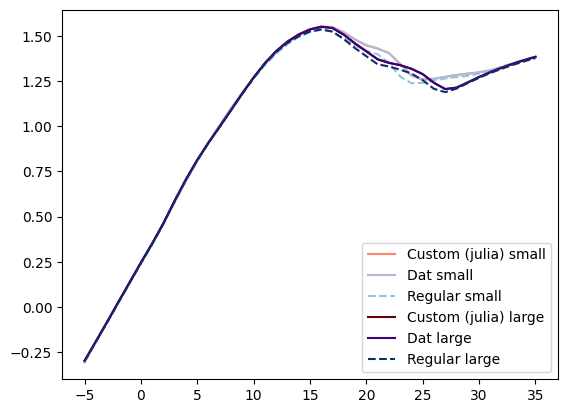

[[ 1.      0.0013]
 [ 0.95    0.0114]
 [ 0.9     0.0208]
 [ 0.8     0.0375]
 [ 0.7     0.0518]
 [ 0.6     0.0636]
 [ 0.5     0.0724]
 [ 0.4     0.078 ]
 [ 0.3     0.0788]
 [ 0.25    0.0767]
 [ 0.2     0.0726]
 [ 0.15    0.0661]
 [ 0.1     0.0563]
 [ 0.075   0.0496]
 [ 0.05    0.0413]
 [ 0.025   0.0299]
 [ 0.0125  0.0215]
 [ 0.      0.    ]
 [ 0.0125 -0.0165]
 [ 0.025  -0.0227]
 [ 0.05   -0.0301]
 [ 0.075  -0.0346]
 [ 0.1    -0.0375]
 [ 0.15   -0.041 ]
 [ 0.2    -0.0423]
 [ 0.25   -0.0422]
 [ 0.3    -0.0412]
 [ 0.4    -0.038 ]
 [ 0.5    -0.0334]
 [ 0.6    -0.0276]
 [ 0.7    -0.0214]
 [ 0.8    -0.015 ]
 [ 0.9    -0.0082]
 [ 0.95   -0.0048]
 [ 1.     -0.0013]]


In [ ]:
# coords = generate_naca_airfoil('2412', num_points=100)
alphas_nf = np.linspace(-5, 35, 41)  # Example alpha range
Re = 1e6  # Example Reynolds number


filename = "../Xfoil/naca2412.dat"

coords = np.loadtxt(filename) # read_airfoil_dat(filename)
models = ["small", "large"] # ["xxsmall", "xsmall", "small", "medium", "large", "xlarge", "xxlarge", "xxxlarge"]
print(coords)

for idx, model in enumerate(models):
    aero_custom = nf.get_aero_from_coordinates(coordinates=coords, alpha=alphas_nf, Re=Re, model_size=model)
    aero_dat = nf.get_aero_from_dat_file(filename=filename, alpha=alphas_nf, Re=Re, model_size=model)
    airfoil = asb.Airfoil("naca2412")
    aero_reg = nf.get_aero_from_airfoil(airfoil=airfoil, alpha=alphas_nf, Re=Re, model_size=model)

    plt.plot(alphas_nf, aero_custom["CL"], color=reds[idx], label=f"Custom (julia) {model}")
    plt.plot(alphas_nf, aero_dat["CL"], color=purples[idx], label=f"Dat {model}")
    plt.plot(alphas_nf, aero_reg["CL"], color=blues[idx], linestyle="--", label=f"Regular {model}")

plt.legend()
plt.show()
print(coords)

In [ ]:
coords1 = generate_airfoil_coordinates(camber, camber_pos, thickness)
coords2 = read_airfoil_dat(filename)

def save_to_text_file(data, filename):
    """
    Save data to a text file.
    
    Parameters:
    data (array): Data to save (like airfoil coordinates)
    filename (str): Name of the file to save to
    """
    with open(filename, 'w') as f:
        # For coordinate data (2D array)
        if isinstance(data, (list, np.ndarray)) and len(data.shape) == 2:
            for row in data:
                # Format each row as space-separated values
                line = ' '.join([f"{value:.6f}" for value in row])
                f.write(line + '\n')
        else:
            # For other types of data
            f.write(str(data))
    
    print(f"Data saved to {filename}")

# Save the coordinates to a text file
save_to_text_file(coords1, "airfoil_coords1.txt")
save_to_text_file(coords2, "airfoil_coords2.txt")

Data saved to airfoil_coords1.txt
Data saved to airfoil_coords2.txt
